<a href="https://colab.research.google.com/github/inuin09/DeepLearning/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.2.7 ReLU 함수

In [ ]:
#ReLU 함수 구현
def relu(x):
  return np.maximun(0, x)

#넘파이의 maximun(): 두 입력 중 큰 값을 선택해 반환하는 함수

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [ ]:
import numpy as np
A=np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [ ]:
np.ndim(A)

#np.ndim() 함수: 배열의 차원 수 확인 가능

1

In [ ]:
A.shape

#배열의 형상은 인스턴스변수인 shape으로 확인 가능

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
#2차원 배열

B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

In [ ]:
B.shape

(3, 2)

### 3.3.2 행렬의 곱

- 행렬의 곱: 왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소별로 곱하고, 그 값들을 더해서 계산

In [ ]:
A=np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [ ]:
B=np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [ ]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

- np.dot(): 두 행렬의 곱
- np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산함
- 일반적인 연산과달리, 행렬의 곱에서는 피연산자의 순서가 다르면 결과도 달라짐

In [ ]:
A=np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [ ]:
B=np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [ ]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

- 행렬의 형상: 행렬 A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 원소 수(행 수)가 같아야함

### 3.3.3 신경망에서의 행렬 곱
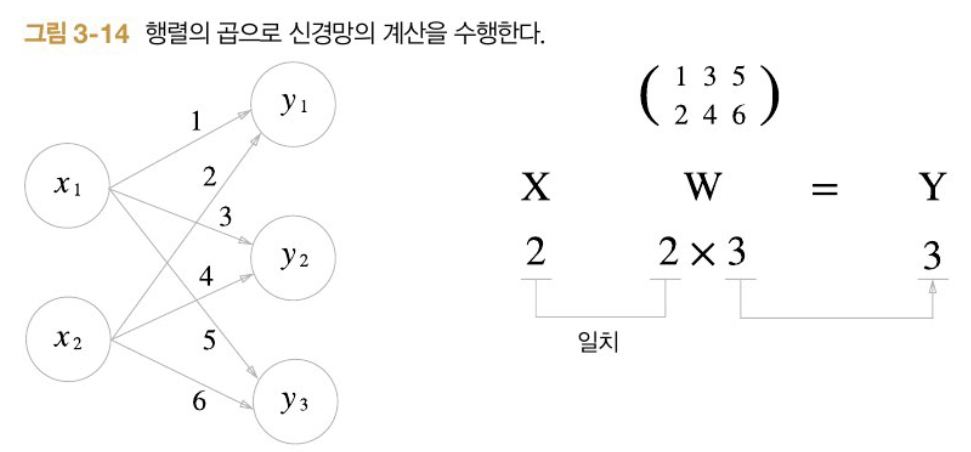

- X와 W의 대응하는 차원의 원소 수는 같아야 함.

In [ ]:
X=np.array([1,2])
X.shape

(2,)

In [ ]:
W=np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [ ]:
W.shape

(2, 3)

In [82]:
Y=np.dot(X, W)
print(Y)

#다차원 배열의 스칼라곱을 구해주는 np.dot 함수를 사용하면, 단번에 결과 Y를 계산할 수 있음

[2. 5. 8.]


## 3.4 3층 신경망 구현하기

3층 신경망에서 수행되는, 입력부터 출력까지의 처리(순방향 처리)을 구현함<br>
이를 위해, 넘파이의 다차원 배열을 사용함<br>
넘파이 다차원 배열을 사용하면, 적은 코드만으로도 신경망의 순방향 처리를 완성할 수 있음

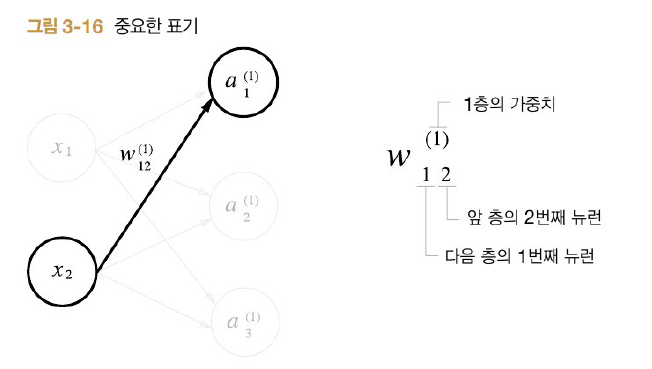

- 그림을 보면, 입력층의 뉴런 $x_2$에서 다음 층의 뉴런 $a^{(1)}$으로 향하는 선 위에 가중치를 표시하고 있음
- 그림과 같이, 가중치와 은닉층 뉴런의 오른쪽 위에 (1)이 붙어 있음. 이는 1층의 가중치, 1층의 뉴런 임을 뜻함.
- 가중치의 오른쪽 아래의 두 숫자는 차례로 다음 층 뉴런과 앞 층 뉴런의 인덱스 번호

## 3.4.2 각 층의 신호 전달 구현하기
이번 절에서는 입력층에서'1층의 1번째 뉴런'으로 가는 신호를 살펴봄 (그림 3-17 참고)

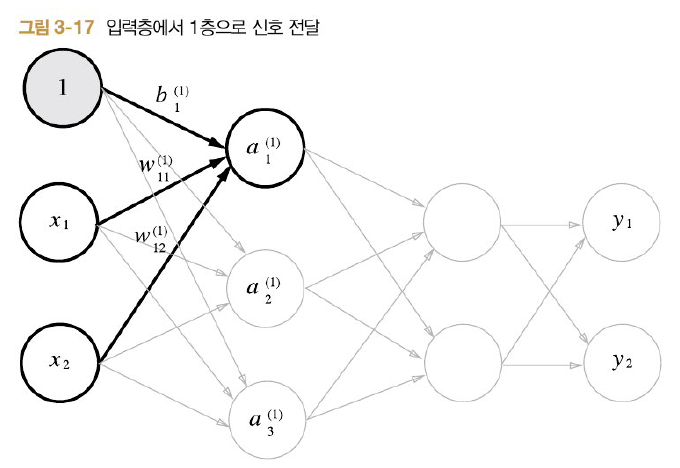

- 그림에서는 편향을 뜻하는 뉴런인 1이 추가되어 있음 (편향은 오른쪽 아래 인덱스가 하나밖에 없음 / 앞 층의 편향 뉴런이 하나뿐이기 때문)

$a_1^{(1)}$을 수식으로 나타내면, 가중치를 곱한 신호 두개와 편향을 합해서 다음과 같이 나타낼 수 있음
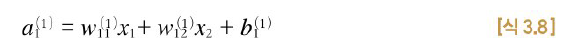

여기서 행렬의 곱을 이용하면, 1층의 '가중치 부분'을 다음처럼 간소화할 수 있음.
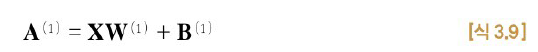

이때, 각 행렬은 다음과 같음
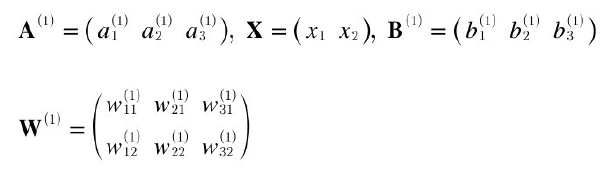

In [83]:
#넘파이의 다차원 배열을 사용하여 식 3.9를 구현 (입력 신호, 가중치, 편향은 임의로 지정)

X=np.array([1.0, 0.5])
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1=np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1=np.dot(X, W1)+B1

(2, 3)
(2,)
(3,)


1층의 활성화 함수에서의 처리를 살펴보면, 다음 그림처럼 나타낼 수 있음

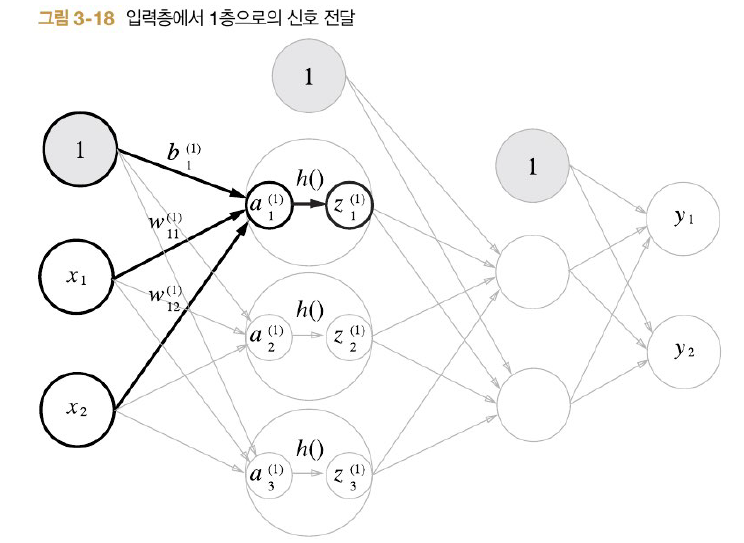

- 그림과 같이 은닉층에서의 가중치 합(가중 신호와 편향의 총합)을 a로 표기하고 활성화 함수 h()로 변환된 신호를 z로 표기함
- 여기서, 활성화 함수는 시그모이드 함수

In [84]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

  #시그모이드 함수는 넘파이 배열을 받아, 같은수의 원소로 구성된 넘파이 배열을 반환함

In [85]:
Z1=sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


: 1층에서 2층으로의 신호 전달

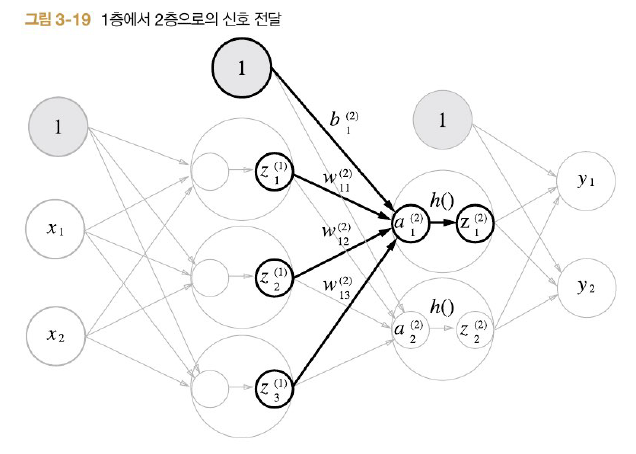

In [86]:
W2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2=np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2=np.dot(Z1, W2) + B2
Z2=sigmoid(A2)

(3,)
(3, 2)
(2,)


위의 구현은1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하면 조금 전의 구현과 동일한 형태임<br>

: 2층에서 출력층으로의 신호 전달

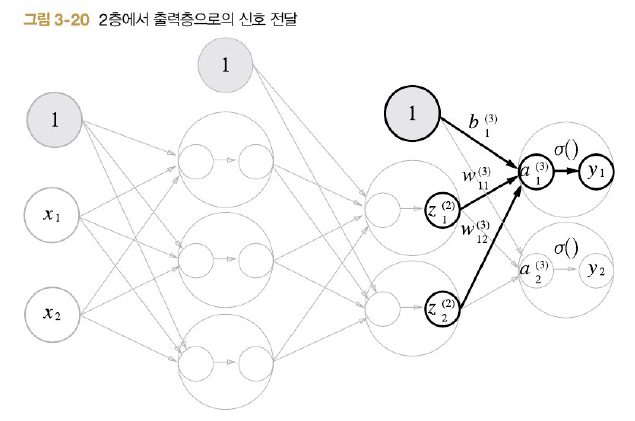

이 부분의 구현은 활성화 함수만 지금까지의 은닉층과 다르다는 것 빼고, 동일함

In [ ]:
def identity_function(x):
  return x

W3=np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])

A3=np.dot(Z2, W3)+B3
Y=identity_function(A3)

- 항등 함수인 identity_function()을 정의하고, 이를 출력층의 활성화 함수로 이용함
- 굳이 이렇게 안해도 되지만, 그동안의 흐름과 통일하기 위해서 이렇게 구현했다고 함
- [그림3-20]에서는 출력층의 활성화 함수를 σ()로 표시하여 은닉층의활성화 함수 h()와는다름을 명시하였음

### 3.4.3 구현 정리

In [ ]:
def init_network():
  network={}
  network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1']=np.array([0.1,0.2,0.3])
  network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2']=np.array([0.1,0.2])
  network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
  network['b3']=np.array([0.1,0.2])

  return network

def forward(network, x):
  W1, W2, W3=network['W1'], network['W2'], network['W3']
  b1, b2, b3=network['b1'], network['b2'], network['b3']

  a1=np.dot(x, W1) +b1
  z1=sigmoid(a1)
  a2=np.dot(z1, W2)+b2
  z2=sigmoid(a2)
  a3=np.dot(z2,W3)+b3
  y=identity_function(a3)

  return y

network=init_network()
x=np.array([1.0,0.5])
y=forward(network, x)
print(y)

[0.31682708 0.69627909]


- init_network() 함수: 가중치와 편향을 초기화하고 이들을 딕션너리 변수인 network에 저장함<br>
  딕셔너리 변수 network에서는 각층에 필요한 매개변수(가중치와 편향)을 저장함
- forward() 함수: 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현함

## 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용할 수 있으나, 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라짐.<br>
일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용함.

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
- 항등 함수는 입력을 그대로 출력(입력과 출력이 항상 같다는 뜻의 항등)
- 출력층에서 항등 함수를 사용하면, 입력 신호가 그대로 출력 신호가 됨<br>
항등 함수의 처리를 신경망 그림으로 나타내면 아래와 같으며, 항등 함수에 의한 변환은 은닉층에서의 활성화함수와 마찬가지로 화살표로 그림
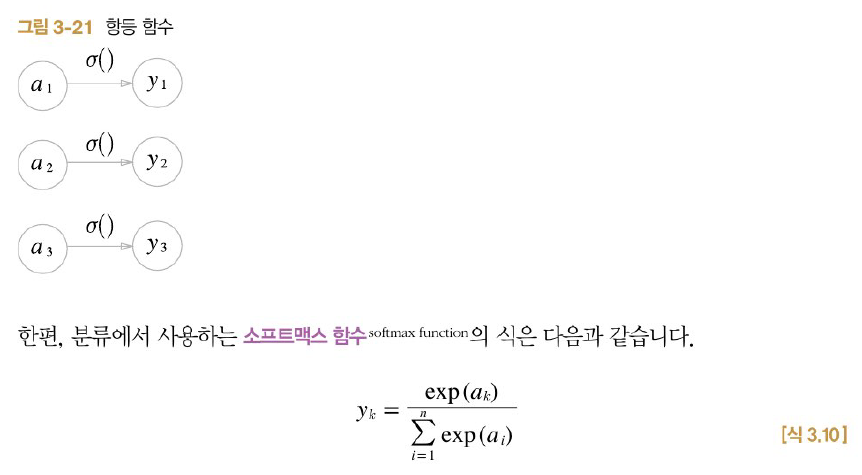

- $exp(x)$는 $e^x$을 뜻하는 지수 함수(e는 자연상수)
- n은 출력층의 뉴런 수
- $y_k$는 그 중 k번째 출력

식 3.10과 같이 소프트맥스 함수의 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력의 신호의 지수 함수의 합으로 구성됨

소프트맥스 함수를 그림으로 나타내면, 아래와 같음.

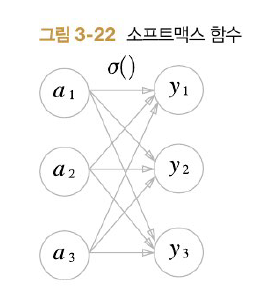

- 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받음
- 식 3.10의 분모에서 보듯, 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문

In [87]:
#소프트맥스 함수 구현
a=np.array([0.3, 2.9, 4.0])

exp_a=np.exp(a) #지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [ ]:
sum_exp_a=np.sum(exp_a) #지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [ ]:
y=exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
#위의 논리 흐름을 파이썬 함수로 정의

def softmax(a):
  exp_a=np.exp(a)
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a

  return y

### 3.5.2 소프트맥스 함수 구현 시 주의점
- 컴퓨터로 softmax() 함수를 계산할 때는 "오버플로" 문제가 발생함
- 소프트맥스 함수는 지수 함수를 사용하는데, 이는 아주 큰 값을 내뱉는 경우가 있음
- 이런 큰 값끼리 나눗셈을 하면 결과 수치가 '불안정'해짐

[오버플로우 문제를 해결하기 위해 개선한 소프트맥스 함수 수식]

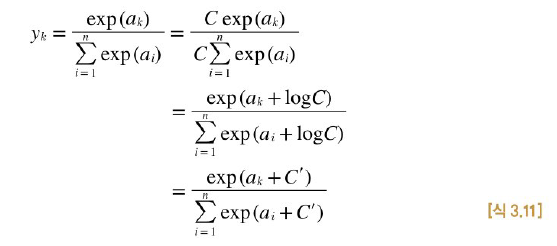

- 식 3.11의 의미: 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않음을 의미함.<br>
  여기서 C'에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적임

In [ ]:
a=np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) #소프트맥스 함수의 계산

#결과는 제대로 계산되지 않을 것임

/tmp/ipython-input-64-4142165484.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) #소프트맥스 함수의 계산
/tmp/ipython-input-64-4142165484.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) #소프트맥스 함수의 계산


array([nan, nan, nan])

In [ ]:
c=np.max(a) #c=1010 (최댓값)
a-c

array([  0, -10, -20])

In [ ]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

- 첫 번째 결과처럼, 아무런 조치 없이 그냥 계산하면 nan이 출력됨
- 하지만, 입력 신호 중 최댓값을 빼주면 올바르게 계산 가능함.

In [ ]:
#개선된 소프트맥스 함수

def softmax(a):
  c=np.max(a)
  exp_a=np.exp(a-c) #오버플로 대책
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a

  return y

### 3.5.3 소프트맥스 함수의 특징

softmax() 함수를 사용하면 신경망의 출력은 다음과 같이 계산 가능함

In [ ]:
a=np.array([0.3, 2.9, 4.0])
y=softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


np.float64(1.0)

- 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수
- 소프트맥스 함수 출력의 총합은 1<br>
  해당 성질로 인하여, 소프트맥스 함수의 출력은 '확률'로 해석할 수 있음<br>
  즉, 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 됨<br>
- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않음<br>
  이는 지수 함수 $y=exp(x)$가 단조 증가 함수이기 때문 (단조 증가 함수란, 정의역 원소 a,b가 $a ≤b$일 때, $f(a) \le f(b)$가 성립하는 함수를 의미함)<br>
- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식함.
- 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않음
- 결과적으로, 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 됨

### 3.5.4 출력층의 뉴런 수 정하기
- 출력층의 뉴런 수는 분류에서 보통 분류하고 싶은 클래스 수로 설정함.

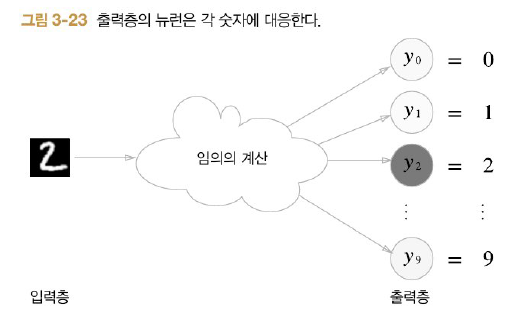

- 그림에서 뉴런의 회색 농도가 해당 뉴런의 출력 값의 크기를 의미함.

## 3.6 손글씨 숫자 인식

*※ 신경망도 두 단계를 거쳐 문제를 해결함.<br>
  먼저, 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수를 학습하고, 추론 단계에서는 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류함*

### 3.6.1 MNIST 데이터셋

- MNIST는 머신러닝 분야에서 아주 유명한 데이터셋
- MNIST 데이터셋은 0부터 9까지의 숫자 이미지로 구성됨.

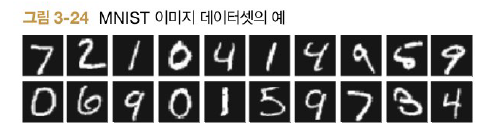

- MNIST의 이미지 데이터는 28X28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지의 값을 가짐
- 각 이미지에는 또한 실제 의미하는 숫자가 레이블로 붙어있음

In [ ]:
import sys, os
# sample_data 경로 추가
sys.path.append(os.path.join(os.getcwd(), 'sample_data'))
from sample_data.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

#각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


- load_mnist 함수: 읽은 MNIST 데이터를 "(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)" 형식으로 반환함
- 인수로는 normalize, flatten, one_hot_label 세 가지를 설정할 수 있고, 세 인수 모두 bool 값임<br>
  : normalize는 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화할지를 정함 / False로 설정하면 입력 이미지의 픽셀은 원래 값 그대로 0 ~ 255 사이의 값을 유지함<br>
  : flatten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정함 / False로 설정하면 입력 이미지를 1X28X28의 3차원 배열로, True로 설정하면 784개의 원소로 이뤄진1차원 배열로 저장함<br>
  : one_hot_label은 레이블을 원-핫 인코딩 형태로 저장할지를 정함

*※원-핫 인코딩 형태는 정답을 뜻하는 원소만 1이고, 나머지는 모두 0인 배열*

In [ ]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), 'sample_data'))
import numpy as np
from sample_data.mnist import load_mnist
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

img=x_train[0]
label = t_train[0]
print(label) #5

print(img.shape)
img=img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


*주의사항*
- flatten=True로 설정해 읽어 들인 이미지는 1차원 넘파이 배열로 저장되어 있음
- 그래서, 이미지를 표현할 때는 원래 형상인 28X28 크기로 다시 변형해야 함
- reshape() 메서드에 원하는 형상을 인수로 지정하면 넘파이 배열의 형상을 바꿀 수 있음
- 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야하며, 이 변환은 image.fromarray()가 수행함

### 3.6.2 신경망의 추론 처리

- 해당 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성
- 입력층 뉴런이 784개인 이유: 28X28
- 출력층 뉴런이 10개인 이유: 문제가 0에서 9까지의 숫자를 구분하는 문제이기 때문
- 은닉층은 총 2개이며, 첫 번째 은닉층에는 50개의 뉴런을, 두 번째 은닉층에는 100개의 뉴런을 배치 (50개와 100개는 임의로 설정한 값)

In [ ]:
import os
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=False)

  return x_test, t_test

def init_network():
    path = os.path.join(os.getcwd(), 'sample_data', 'sample_weight.pkl')
    with open(path, 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y=softmax(a3)

  return y

- init_network() 에서는 pickle 파일인 sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽음
- 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있음

In [ ]:
#위의 세 함수를 이용하여 신경망에 의한 추론을 수행해보고, 정확도도 평가

x, t = get_data()
network=init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y=predict(network, x[i])
  p=np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻음
  if p==t[i]:
    accuracy_cnt+=1

print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


*위의 코드 설명*
- 가장 먼저 MNIST 데이터셋을 얻고, 네트워크를 생성
- for 문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류함<br>
  : predict() 함수는 각 레이블의 확률을 넘파이 배열로반환함
- np.argmax() 함수로 이 배열에서 값이 가장 큰(확률이 가장 높은) 원소의 인덱스를 구함<br>
  : 이 인덱스가 바로 예측 결과
- 마지막으로, 신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자(accuracy_cnt)을 세고, 이를 전체 이미지숫자로 나눠 정확도를 구함


- Accuracy:0.9352는 93.52%라는 의미임

- load_mnist 함수의 인수인 normalize을 True로 설정함<br>
  : 이는 0 ~ 255 범위인 각 픽셀의 값을 0.0 ~ 1.0 범위로 변환함 (단순히 픽셀의 값을 255로 나눔)
- 이처럼 데이터를 특정 범위로 변환하는 처리를 "정규화"라고 함
- 신경망의 입력 데이터에 특정 변환을 가하는 작업을 "전처리"라고 함

### 3.6.3 배치 처리

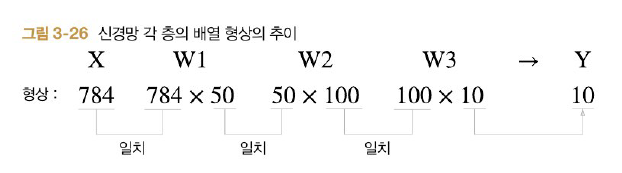

- 위의 그림은 원소 784개로 구성된 1차원 배열이 입력되어 마지막에는 원소가 10개인 1차원 배열이 출력되는 흐름을 나타내고 있음.
- 이는 이미지 데이터를 1장만 입력했을 때의 처리 흐름임

그렇다면, 이미지 여러 장을 한꺼번에 입력하는 경우에는?

- 이미지 100개를 묶어 predict() 함수에 한 번에 넘긴다면, 다음과 같이 표현할 수 있음

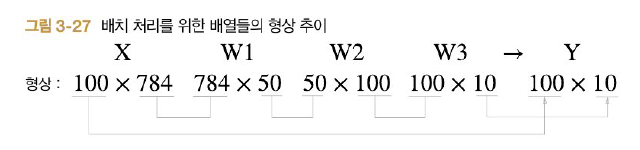

- x[0]과 y[0]에는 0번째 이미지와 그 추론 결과가, x[1]과 y[1]에는 1번째 이미지와 그 결과가 저장되는 방식임
- 이처럼 하나로 묶은 입력 데이터를 배치(batch)라고 함.

In [ ]:
#앞서 구현한 신경망 각 층의 가중치 형상 출력
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [ ]:
x[0].shape

(784,)

In [ ]:
W1.shape

(784, 50)

In [ ]:
W2.shape

(50, 100)

In [ ]:
W3.shape

(100, 10)

- 이 결과에서 다차원 배열의 대응하는 차원의 원소 수가 일치함을 알 수 있음

[배치 처리]<br>
- 배치 처리는 이미지 1장당 처리 시간을 대폭 줄여줌
  : 수치 계산 라이브러리대부분이큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있기 때문
  : 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 배치 처리를 함으로써 버스에 주는 부하를 줄일 수 있음
- 즉, 배치 처리를 수행함으로써 큰 배열로 이뤄진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 편이 분할된 작은 배열을 여러 번 계산할 때보다 빠름

In [ ]:
#배치 처리 구현

x, t = get_data()
network = init_network()

batch_size = 100 #배치 크기
acuracy_cnt=0

for i in range(0, len(x), batch_size):
  x_batch=x[i:i+batch_size]
  y_batch=predict(network, x_batch)
  p=np.argmax(y_batch, axis=1)
  accuracy_cnt+=np.sum(p==t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:1.8704


- range() 함수: range(start, end)처럼 인수 2개를 지정해 호출하면 end-1까지의 정수를 차례로 변환하는 반복지를 돌려줌
- range(start, end, step)처럼 인수를 3개 지정하면 start에서 end-1까지 step 간격으로 증가하는 정수를 반환하는 반복자를 돌려줌

In [ ]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
list(range(0,10,3))

[0, 3, 6, 9]

In [ ]:
x=np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y=np.argmax(x, axis=1)
print(y)

[1 2 1 0]


- axis=1는 100X10의 배열 중 1번째 차원을 구성하는 각 원소에서 (1번째 차원을 축으로) 최댓값의 인덱스를 찾도록 하는 것임